In [2]:
from project_utils import * 
main_dir = f'{user}/Desktop/SNT_data/SNT-online_behavioral/Data'
data = pd.read_excel('../../All-data_summary_n877.xlsx') # new factors included
dots = pd.read_excel('../../taskVdots_n912.xlsx')
fa01 = pd.read_excel('../../FA01_n912.xlsx') # social, mood, compulsive factors
data = merge_dfs([data, dots, fa01])

In [24]:
demo_cols = [col for col in data.columns if 'demo' in col]
subj_status = ['demo_ladder_rate']
obj_status  = ['demo_household_income','demo_edu_level','demo_occupation'] # also: 'demo_zip_code
status      = subj_status + obj_status
health      = ['demo_psych_med_current', 'demo_diag_6mo']

In [44]:
# find columns with 'marriage in it
marriage_cols = [col for col in data.columns if 'marriage' in col]
marriage_cols

['demo_marriage',
 'marriage_01_time_known',
 'marriage_01_frequency',
 'marriage_01_similarity',
 'marriage_01_likability',
 'marriage_01_impact',
 'marriage_01_popularity',
 'marriage_01_competence',
 'marriage_01_friendliness',
 'marriage_01_dominance',
 'marriage_01_dots_affil',
 'marriage_01_dots_power']

# Health

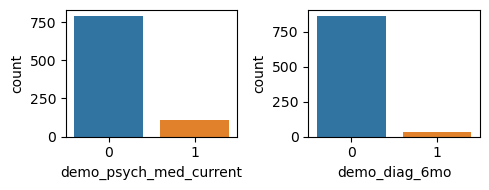

In [22]:
fig, ax = plt.subplots(1,2, figsize=(5, 2))
sns.countplot(data=data, x='demo_psych_med_current', ax=ax[0])
sns.countplot(data=data, x='demo_diag_6mo', ax=ax[1])
plt.tight_layout()
plt.show()

# Status markers

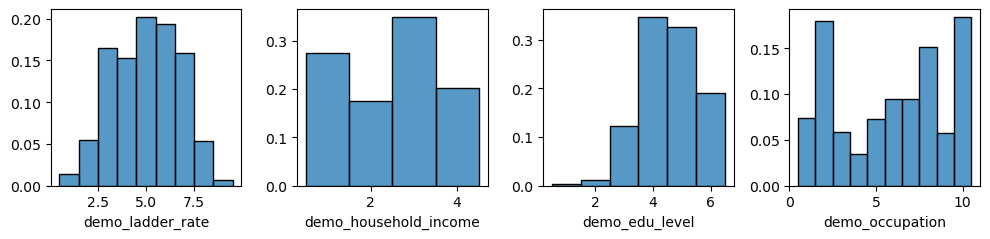

In [25]:
fig, axs = plt.subplots(1, len(status), figsize=(len(status)*2.5, 2.5))
for c, col in enumerate(status):
    sns.histplot(ax=axs[c], data=data, x=col, kde=False, stat='density', discrete=True)
    axs[c].set_ylabel('')
plt.tight_layout()
plt.show()

### Employment
- 1, Transport, Retail, or Wholesale
- 2, Business and Other Services, Finance or Insurance
- 3, Manufacturing, Construction, or Agriculture
- 4, Hospitality, Catering or Leisure Services
- 5, Health or Social Care
- 6, Public Sector or Education
- 7, Student
- 8, Unemployed
- 9, Looking for Employment
- 10, Other

In [42]:
# rescore employmnet to group together employed (1), unemployed (3), sttudents (2)
data['demo_occupation_rescored'] = data['demo_occupation'].replace({1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:2, 8:3, 9:3})

# maybe want to visualize interactins between age, household income, employment, marriage and children....

### Household income
- 1, < 33k
- 2, 33-50k
- 3, 50-100k
- 4, 100-350k
- 5, 350k+

In [64]:
# add a column labeling household income
data['household_income_label'] = np.nan
data.loc[data['demo_household_income'] == 1, 'household_income_label'] = '<33k'
data.loc[data['demo_household_income'] == 2, 'household_income_label'] = '33-50k'
data.loc[data['demo_household_income'] == 3, 'household_income_label'] = '50-100k'
data.loc[data['demo_household_income'] == 4, 'household_income_label'] = '100-350k'
data.loc[data['demo_household_income'] == 5, 'household_income_label'] = '>350k'

# other rescoring column
data['household_income_rescored'] = data['demo_household_income'].replace({1:1, 2:1, 3:2, 4:2, 5:2})

###  Educational attainment
- 1, 1-8 Less than high school
- 2, 9-11 Some high school
- 3, 12 High school degree
- 4, 13-15 Some college
- 5, 16 Bachelor's degree in college (4-year)
- 6, 17-25 Graduate School

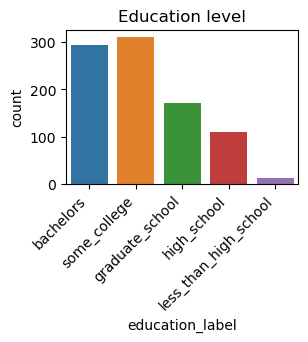

In [18]:
# add a column rescoring the education
data['education_label'] = np.nan
data['education_rescored'] = np.nan
for i, row in data.iterrows():
    education = row['demo_edu_level']

    if education == 1 or education == 2:
        data.loc[i, 'education_rescored'] = 1
        data.loc[i, 'education_label'] = 'less_than_high_school'
    elif education == 3:
        data.loc[i, 'education_rescored'] = 2
        data.loc[i, 'education_label'] = 'high_school'
    elif education == 4:
        data.loc[i, 'education_rescored'] = 3
        data.loc[i, 'education_label'] = 'some_college'
    elif education == 5:
        data.loc[i, 'education_rescored'] = 4
        data.loc[i, 'education_label'] = 'bachelors'
    elif education == 6:
        data.loc[i, 'education_rescored'] = 5
        data.loc[i, 'education_label'] = 'graduate_school'

# plot barplot 
plt.figure(figsize=(3,2))
sns.countplot(x='education_label', data=data)
plt.title('Education level')
plt.xticks(rotation=45, ha='right')
plt.show()

# Relate social distance to status & health
- 'Objective' status in terms of household SES is best; better than sni, ladder, etc...
- also social factor, age

In [50]:
# find columns with sni in name
cols = [col for col in data.columns if 'ucls' in col]
cols

['ucls_1',
 'ucls_2',
 'ucls_3',
 'ucls_4',
 'ucls_5',
 'ucls_6',
 'ucls_7',
 'ucls_8',
 'ucls_score']

In [1]:
# run_ols(['demo_ladder_rate', 'C(demo_household_income)', 
#         'demo_psych_med_current', 'C(demo_occupation_rescored)', 'C(demo_marriage)',
#         'sni_number_ppl','sni_network_diversity', 'factor_social_min'], 
#         'pov_dist_mean_mean', 
#         data, covariates=demo_controls)[1].summary()

run_ols(['C(household_income)',
         'factor_social_min', 'demo_age'], 
         'pov_dist_mean_mean', 
          data)[1].summary()

NameError: name 'run_ols' is not defined